In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual


#setting the chartsize

plt.rcParams['figure.figsize']= (15,7)
plt.style.use('fivethirtyeight')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
data=pd.read_csv('jobs.csv.csv')

In [16]:
data.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01


In [17]:
data.shape

(66, 14)

In [19]:
data.isnull().sum()

ID                      0
JobFamily               0
JobFamilyDescription    0
JobClass                0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

In [20]:
data.columns

Index(['ID', 'JobFamily', 'JobFamilyDescription', 'JobClass',
       'JobClassDescription', 'PayGrade', 'EducationLevel', 'Experience',
       'OrgImpact', 'ProblemSolving', 'Supervision', 'ContactLevel',
       'FinancialBudget', 'PG'],
      dtype='object')

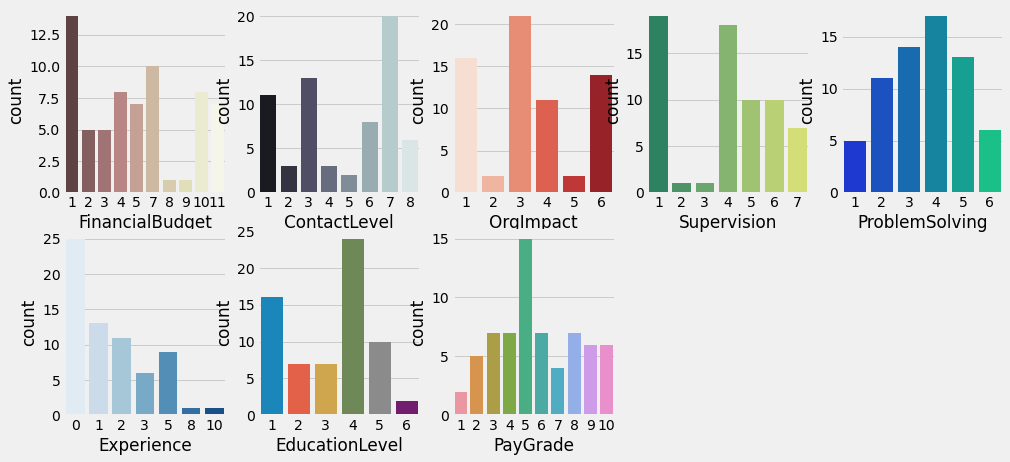

In [28]:
plt.subplot(2,5,1)
sns.countplot(data['FinancialBudget'], palette='pink')

plt.subplot(2,5,2)
sns.countplot(data['ContactLevel'], palette='bone')

plt.subplot(2,5,3)
sns.countplot(data['OrgImpact'], palette='Reds')


plt.subplot(2,5,4)
sns.countplot(data['Supervision'], palette='summer')


plt.subplot(2,5,5)
sns.countplot(data['ProblemSolving'], palette='winter')


plt.subplot(2,5,6)
sns.countplot(data['Experience'], palette='Blues')


plt.subplot(2,5,7)
sns.countplot(data['EducationLevel'])

plt.subplot(2,5,8)
sns.countplot(data['PayGrade'])



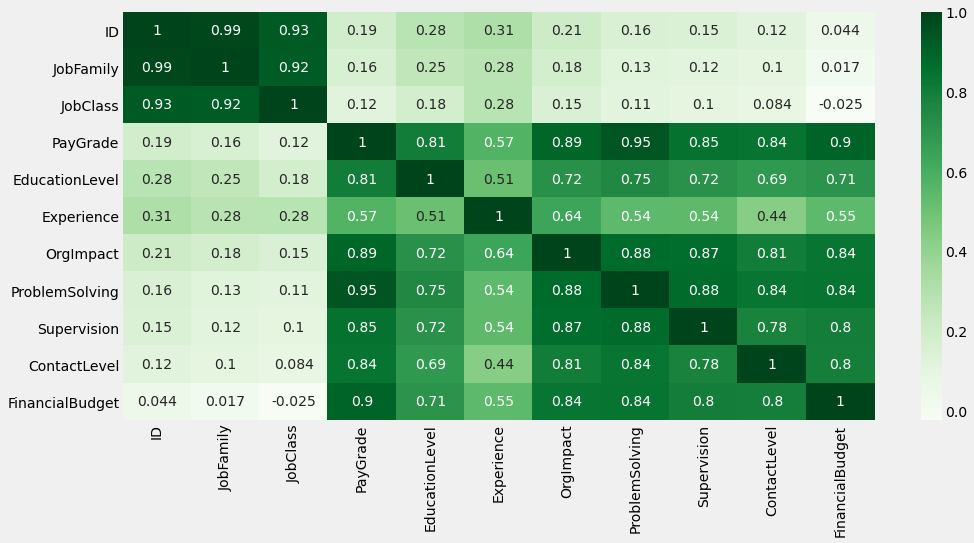

In [33]:
#FInding important metric for salary

sns.heatmap(data.corr(), cmap='Greens', annot=True)

In [36]:
#Grouping the data wrt to jobs family

x=data.groupby(['JobFamilyDescription']).agg('mean')
x=x.drop(['ID','JobFamily','JobClass'], axis=1)
x.style.background_gradient(cmap='Reds')

,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
JobFamilyDescription,,,,,,,,
Accounting And Finance,7.250000,4.000000,2.250000,5.000000,4.500000,5.500000,6.250000,8.250000
Administrative Support,3.000000,2.200000,0.600000,1.600000,1.800000,1.800000,3.200000,3.800000
Baker,6.333333,2.000000,0.000000,2.666667,4.333333,2.333333,4.333333,5.333333
Buildings And Facilities,5.500000,2.375000,0.500000,3.000000,3.750000,4.125000,5.000000,5.000000
Buyer,7.333333,3.333333,3.666667,5.000000,4.333333,5.333333,5.666667,7.333333
Cashier,3.333333,2.666667,2.333333,2.666667,2.666667,3.666667,3.333333,3.000000
Communications And Media,4.500000,2.500000,0.300000,2.000000,2.900000,2.800000,4.000000,3.800000
Corporate Research,5.800000,4.000000,2.400000,3.400000,3.600000,3.800000,3.400000,5.200000
Finance And Accounting,6.666667,4.000000,2.000000,4.000000,4.333333,5.000000,5.333333,7.333333


In [40]:
@interact_manual
def check(column = data.select_dtypes('number').columns[3:], column1=data.select_dtypes('number').columns[4:],):
    sns.barplot(data[column],data[column1])
    plt.xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='column', options=('PayGrade', 'EducationLevel', 'Experience', 'Org…

In [41]:
df=pd.read_csv('naukri.csv')

In [42]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [ ]:
data['joblocation_address']=data['joblocation_address'].str.split(','
                                                                )